# IMPORT LIBRARY

In [67]:
# Data Manipulation and Graph
import pandas as pd
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

In [68]:
df= pd.read_csv('csv/Regresi A5_final.csv')
df.head(10)

,tahun,bulan,tanggal,stasiun,karbon_monoksida
0,2024,1,1,DKI5 Kebon Jeruk Jakarta Barat,18.0
1,2024,1,2,DKI5 Kebon Jeruk Jakarta Barat,9.0
2,2024,1,3,DKI5 Kebon Jeruk Jakarta Barat,7.0
3,2024,1,4,DKI5 Kebon Jeruk Jakarta Barat,10.0
4,2024,1,5,DKI5 Kebon Jeruk Jakarta Barat,15.0
5,2024,1,6,DKI5 Kebon Jeruk Jakarta Barat,12.0
6,2024,1,7,DKI5 Kebon Jeruk Jakarta Barat,23.0
7,2024,1,8,DKI5 Kebon Jeruk Jakarta Barat,12.0
8,2024,1,9,DKI5 Kebon Jeruk Jakarta Barat,18.0
9,2024,1,10,DKI5 Kebon Jeruk Jakarta Barat,11.0


# DATA SPLITTING

In [69]:
import os
def data_spliting (percent):
    df = pd.read_csv('csv/Regresi A5_final.csv')
    split_point = int(len(df) * percent)
    train = df[:split_point]
    test = df[split_point:]

    file_path_train = os.path.join('csv', f'data_train_{percent}.csv')
    file_path_test = os.path.join('csv', f'data_test_{percent}.csv')

    train.to_csv(file_path_train, index=False)
    test.to_csv(file_path_test, index=False)
    
data_spliting(0.7) #70%
data_spliting(0.8) #80%

# MODEL TRAINING

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
# from xgboost import XGBRegressor


from sklearn.metrics import mean_absolute_error, r2_score

# --- Fungsi buat dataset lag ---
def create_dataset(series, time_step=4, feature_name="karbon_monoksida", recent_first=True):
    s = np.asarray(series).ravel()
    X, y = [], []
    for i in range(len(s) - time_step):
        window = s[i:i+time_step]
        if recent_first:
            window = window[::-1]
        X.append(window)
        y.append(s[i+time_step])
    return np.array(X), np.array(y)

train_df_08 = pd.read_csv("csv/data_train_0.8.csv")
test_df_08 = pd.read_csv("csv/data_test_0.8.csv")

y_train_raw_08 = train_df_08["karbon_monoksida"]
y_test_raw_08 = test_df_08["karbon_monoksida"]

X_train_08, y_train_08 = create_dataset(y_train_raw_08, 4)
X_test_08, y_test_08 = create_dataset(y_test_raw_08, 4)


train_df_07 = pd.read_csv("csv/data_train_0.7.csv")
test_df_07 = pd.read_csv("csv/data_test_0.7.csv")

y_train_raw_07 = train_df_07["karbon_monoksida"]
y_test_raw_07 = test_df_07["karbon_monoksida"]

X_train_07, y_train_07 = create_dataset(y_train_raw_07, 4)
X_test_07, y_test_07 = create_dataset(y_test_raw_07, 4)


# --- Plot ---
def plot(y_test, y_pred):
    plt.figure(figsize=(10,5))
    plt.plot(y_test, label="Aktual", marker='o')
    plt.plot(y_pred, label="Prediksi", marker='x')
    plt.title("Aktual vs Prediksi - Linear Regression")
    plt.legend()
    plt.grid()
    plt.show()

## Linear Regression

### S1: 70/30

Linear Regression
MAE : 3.6895540089356342
R²  : 0.06604966867268935


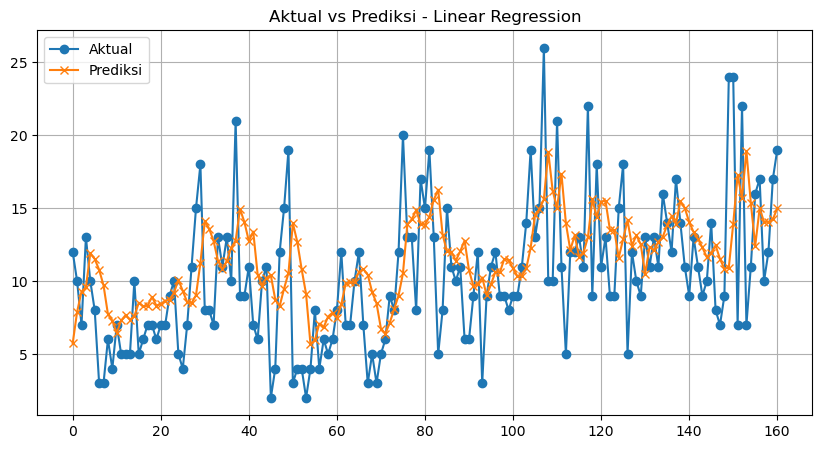

In [71]:
model = LinearRegression()
model.fit(X_train_07, y_train_07)
y_pred_07 = model.predict(X_test_07)

# --- Evaluasi ---
mae = mean_absolute_error(y_test_07, y_pred_07)
r2 = r2_score(y_test_07, y_pred_07)

print("Linear Regression")
print("MAE :", mae)
print("R²  :", r2)

# --- Plot ---
plot(y_test_07, y_pred_07)

### S2: 80/20

Linear Regression
MAE : 3.5182925694091467
R²  : 0.07242797874839868


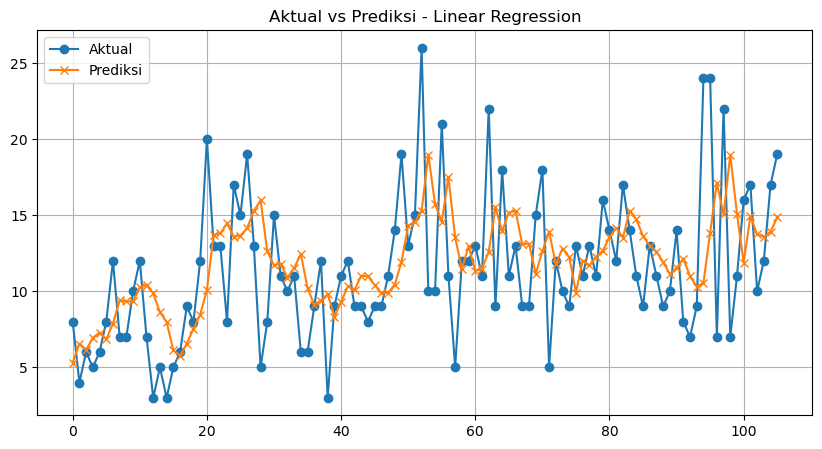

In [ ]:
model = LinearRegression()
model.fit(X_train_08, y_train_08)
y_pred_08 = model.predict(X_test_08)

# --- Evaluasi ---
mae = mean_absolute_error(y_test_08, y_pred_08)
r2 = r2_score(y_test_08, y_pred_08)

print("Linear Regression")
print("MAE :", mae)
print("R²  :", r2)

# --- Plot ---
plot(y_test_08, y_pred_08)

## Gradient Boosting

### S1: 70/30

Gradient Boosting
MAE : 4.149894755908711
R²  : -0.43289227434371336


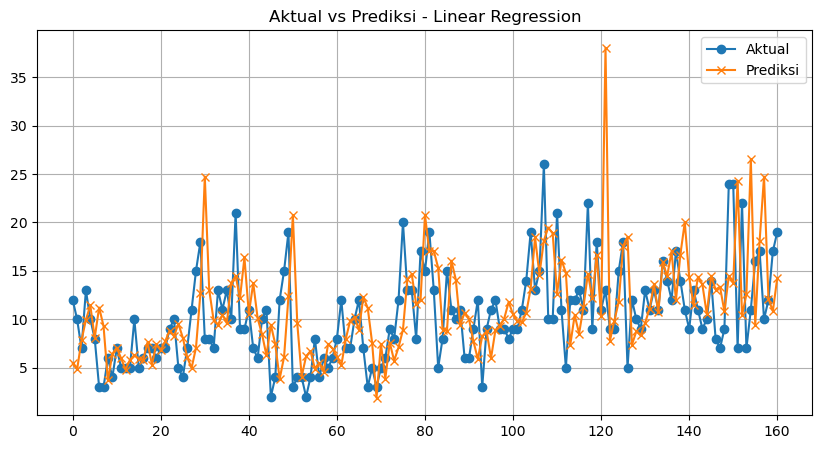

In [ ]:
# --- Model ---
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_07, y_train_07)
y_pred_07 = model.predict(X_test_07)

# --- Evaluasi ---
mae = mean_absolute_error(y_test_07, y_pred_07)
r2 = r2_score(y_test_07, y_pred_07)

print("Gradient Boosting")
print("MAE :", mae)
print("R²  :", r2)

# --- Plot ---
plot(y_test_07, y_pred_07)

### S2: 80/20

Gradient Boosting
MAE : 3.9558195275940746
R²  : -0.4115784734052832


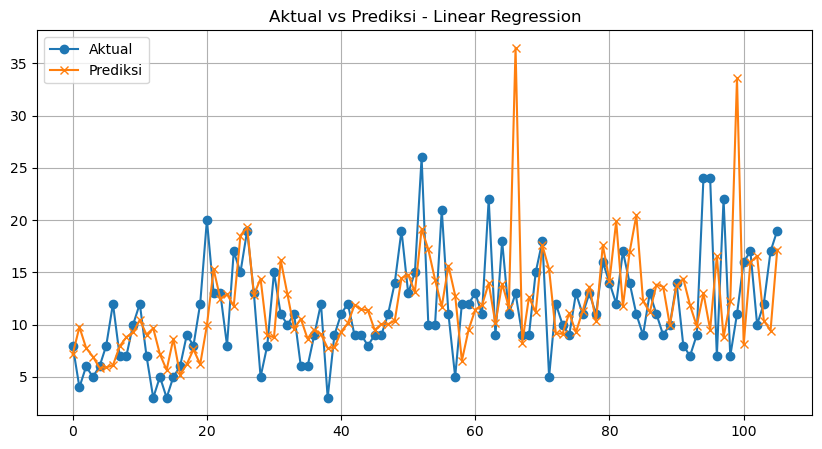

In [78]:
# --- Model ---
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_08, y_train_08)
y_pred_08 = model.predict(X_test_08)

# --- Evaluasi ---
mae = mean_absolute_error(y_test_08, y_pred_08)
r2 = r2_score(y_test_08, y_pred_08)

print("Gradient Boosting")
print("MAE :", mae)
print("R²  :", r2)

# --- Plot ---
plot(y_test_08, y_pred_08)

## ADA Boost

### S1: 70/30

AdaBoost
MAE : 4.461491729471931
R²  : -0.48255263413148586


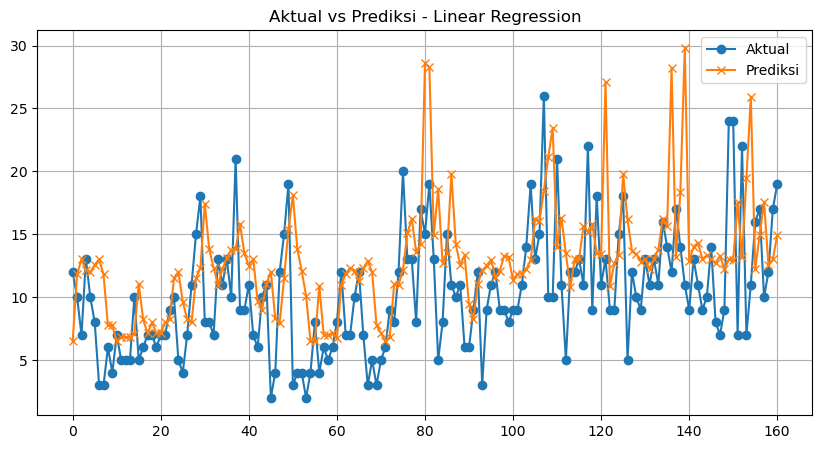

In [ ]:
model = AdaBoostRegressor(random_state=42, n_estimators=200)
model.fit(X_train_07, y_train_07)
y_pred_07 = model.predict(X_test_07)

# --- Evaluasi ---
mae = mean_absolute_error(y_test_07, y_pred_07)
r2 = r2_score(y_test_07, y_pred_07)

print("AdaBoost")
print("MAE :", mae)
print("R²  :", r2)

# --- Plot ---
plot(y_test_07, y_pred_07)

### S2: 80/20

In [ ]:
model = AdaBoostRegressor(random_state=42, n_estimators=200)
model.fit(X_train_08, y_train_08)
y_pred_08 = model.predict(X_test_08)

# --- Evaluasi ---
mae = mean_absolute_error(y_test_08, y_pred_08)
r2 = r2_score(y_test_08, y_pred_08)

print("AdaBoost")
print("MAE :", mae)
print("R²  :", r2)

plot(y_test_08, y_pred_08)

AdaBoost
MAE : 4.2522789962181955
R²  : -0.46368770486582656


## XG Boost

### S1: 70/30

### S2: 80/20

# MODEL EVALUATION

## MAE

## RMSE

## MAPE

## R-squared

# Export Requirements.txt

In [77]:
import pkg_resources

packages = [
    'pandas',
    'scikit-learn',
]

with open("lukas_requirements.txt", "w") as f:
    for pkg in packages:
        try:
            version = pkg_resources.get_distribution(pkg).version
            f.write(f"{pkg}=={version}\n")
        except pkg_resources.DistributionNotFound:
            print(f"Package {pkg} not found in the environment.")
